## Observations and Insights 

Observation or Inferences:

(1) When comparing the final tumor volume(mm3) for the targeted four drugs, Ramicane appears to outperform the rest of drug including our drug of interest, Capomulin. 
    From the equal sample size of 25 mouse for each four comparsion drugs, it is evident that Ramicane show marked result in reduing the tumor volume.
    a) The lowest mean of 36.19139 mm3 of the group and vs. 36.6675 for Capomulin
    b) The lowest median of 36.56165 mm3 of the group and vs. 38.1251 for Capomulin
    d) The lowest max of 45.22087 mm3 of the group and vs. 47.6859 for Capomulin
    d) The loweest min of 22.05013 mm3 of the group and vs. 23.3435 for Capomulin

(2) From the result of scatter plot, correlation and regression between Mouse Weight and Tumor Volume, it seems to have positive corrlation.
    It means that the heavier the mouse weight, the larger the tumor volume

(3) Before we can rely upon on this study, more study and consideration are required. Whilst reviewing the dataset, it seems that Capomulin and Ramicane were testing lighter weight of the testing mouse (ranging from 15g to 25g) while Ceftamin and Infubino were tesing mouse much heavier (ranging from 23g to 30g). Maybe that is one of the reason why Ceftmain and Infubina were not as effective in reducing the tumor volume as dosage were applied to a larger testing subject. 




In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Resource/Mouse_metadata.csv"
study_results_path = "Resource/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Trial_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
Trial_data_complete_df = Trial_data_complete
Trial_data_complete_df.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice.
No_of_mouse = len(Trial_data_complete_df["Mouse ID"].unique())
No_of_mouse



249

In [8]:
#Rename the column Name for Mouse ID to MouseID
Trial_data_complete_renamed_df = Trial_data_complete_df.rename(columns={"Mouse ID":"MouseID"})
Trial_data_complete_renamed_df

,MouseID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Inserting a new column by concat Mouse ID and timepoint to identify any duplicated data (search from Youtube)
Trial_data_complete_renamed_df["MouseID_Timepoint"] = Trial_data_complete_renamed_df["MouseID"] + '-' + Trial_data_complete_renamed_df["Timepoint"].astype(str)
Trial_data_complete_renamed_df

,MouseID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,MouseID_Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,k403-0
1,k403,Ramicane,Male,21,16,5,38.825898,0,k403-5
2,k403,Ramicane,Male,21,16,10,35.014271,1,k403-10
3,k403,Ramicane,Male,21,16,15,34.223992,1,k403-15
4,k403,Ramicane,Male,21,16,20,32.997729,1,k403-20
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,z969-25
1889,z969,Naftisol,Male,9,30,30,65.841013,3,z969-30
1890,z969,Naftisol,Male,9,30,35,69.176246,4,z969-35
1891,z969,Naftisol,Male,9,30,40,70.314904,4,z969-40


In [10]:
#Save the rename df to a variable
Trial_data_complete_rename =Trial_data_complete_renamed_df

In [11]:
#Find out how many duplicated data for the same MouseID and same Timepoint (search from youtube)
Trial_data_complete_renamed_df["MouseID_Timepoint"].duplicated().sum()

5

In [12]:
#Call out and print those 5 duplicated data by the column "MouseID_Timepoint"
#Result show they are related to one particular MouseID
Trial_data_complete_rename.loc[Trial_data_complete_renamed_df["MouseID_Timepoint"].duplicated(), :]

,MouseID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,MouseID_Timepoint
909,g989,Propriva,Female,21,26,0,45.000000,0,g989-0
911,g989,Propriva,Female,21,26,5,47.570392,0,g989-5
913,g989,Propriva,Female,21,26,10,49.880528,0,g989-10
915,g989,Propriva,Female,21,26,15,53.442020,0,g989-15
917,g989,Propriva,Female,21,26,20,54.657650,1,g989-20


In [13]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Trial_data_complete_cleaned_df = Trial_data_complete_rename[Trial_data_complete_rename["MouseID"] != "g989"]
Trial_data_complete_cleaned_df

,MouseID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,MouseID_Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,k403-0
1,k403,Ramicane,Male,21,16,5,38.825898,0,k403-5
2,k403,Ramicane,Male,21,16,10,35.014271,1,k403-10
3,k403,Ramicane,Male,21,16,15,34.223992,1,k403-15
4,k403,Ramicane,Male,21,16,20,32.997729,1,k403-20
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,z969-25
1889,z969,Naftisol,Male,9,30,30,65.841013,3,z969-30
1890,z969,Naftisol,Male,9,30,35,69.176246,4,z969-35
1891,z969,Naftisol,Male,9,30,40,70.314904,4,z969-40


In [14]:
#After removing the mouse that had duplicated timepoint, check how many mouse in the dataset
No_of_mouse_checker = len(Trial_data_complete_cleaned_df["MouseID"].unique())
No_of_mouse_checker

248

## Summary Statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


In [16]:
#Looking at the column name
Trial_data_complete_cleaned_df.columns

Index(['MouseID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'MouseID_Timepoint'],
      dtype='object')

In [17]:
#To start my summary statistics. Have a look at how many regimens we have in the dataset
No_of_regimen = (Trial_data_complete_cleaned_df["Drug Regimen"].unique())
No_of_regimen

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [18]:
Mean_Tumor_Volume = Trial_data_complete_cleaned_df.groupby("Drug Regimen").mean()['Tumor Volume (mm3)']
Mean_Tumor_Volume

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [19]:
Mean_Age_Months = Trial_data_complete_cleaned_df.groupby("Drug Regimen").mean()['Age_months']
Mean_Age_Months 


Drug Regimen
Capomulin    13.456522
Ceftamin     13.247191
Infubinol    16.230337
Ketapril     15.659574
Naftisol     12.000000
Placebo      10.734807
Propriva     10.006757
Ramicane     10.684211
Stelasyn     12.784530
Zoniferol    12.598901
Name: Age_months, dtype: float64

In [20]:
Mean_Weight = Trial_data_complete_cleaned_df.groupby("Drug Regimen").mean()['Weight (g)']
Mean_Weight

Drug Regimen
Capomulin    19.965217
Ceftamin     27.398876
Infubinol    27.196629
Ketapril     27.861702
Naftisol     27.166667
Placebo      27.928177
Propriva     27.135135
Ramicane     19.679825
Stelasyn     27.856354
Zoniferol    27.692308
Name: Weight (g), dtype: float64

In [21]:
Mean_Metastatic_Sites = Trial_data_complete_cleaned_df.groupby("Drug Regimen").mean()['Metastatic Sites']
Mean_Metastatic_Sites

Drug Regimen
Capomulin    0.713043
Ceftamin     1.179775
Infubinol    0.960674
Ketapril     1.297872
Naftisol     1.182796
Placebo      1.441989
Propriva     1.013514
Ramicane     0.548246
Stelasyn     0.872928
Zoniferol    1.230769
Name: Metastatic Sites, dtype: float64

In [22]:
Median_Tumor_Volume = Trial_data_complete_cleaned_df.groupby("Drug Regimen").median()['Tumor Volume (mm3)']
Median_Tumor_Volume

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [23]:
Median_Age_Months = Trial_data_complete_cleaned_df.groupby("Drug Regimen").median()['Age_months']
Median_Age_Months

Drug Regimen
Capomulin    16.5
Ceftamin     12.0
Infubinol    20.0
Ketapril     18.0
Naftisol      9.0
Placebo      10.0
Propriva      7.5
Ramicane      9.0
Stelasyn     14.0
Zoniferol    12.5
Name: Age_months, dtype: float64

In [24]:
Median_Weight = Trial_data_complete_cleaned_df.groupby("Drug Regimen").median()['Weight (g)']
Median_Weight


Drug Regimen
Capomulin    20.5
Ceftamin     28.0
Infubinol    27.0
Ketapril     28.0
Naftisol     27.0
Placebo      28.0
Propriva     26.0
Ramicane     19.0
Stelasyn     28.0
Zoniferol    28.0
Name: Weight (g), dtype: float64

In [25]:
Median_Metastatic_Sites = Trial_data_complete_cleaned_df.groupby("Drug Regimen").median()['Metastatic Sites']
Median_Metastatic_Sites

Drug Regimen
Capomulin    0.0
Ceftamin     1.0
Infubinol    1.0
Ketapril     1.0
Naftisol     1.0
Placebo      1.0
Propriva     1.0
Ramicane     0.0
Stelasyn     1.0
Zoniferol    1.0
Name: Metastatic Sites, dtype: float64

In [26]:
Variance_Tumor_Volume = Trial_data_complete_cleaned_df.groupby("Drug Regimen").var()['Tumor Volume (mm3)']
Variance_Tumor_Volume

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [27]:
Variance_Age_Months = Trial_data_complete_cleaned_df.groupby("Drug Regimen").var()['Age_months']
Variance_Age_Months

Drug Regimen
Capomulin    59.620372
Ceftamin     65.147591
Infubinol    56.404272
Ketapril     36.236432
Naftisol     45.102703
Placebo      40.384837
Propriva     48.251655
Ramicane     35.362393
Stelasyn     63.036648
Zoniferol    33.479115
Name: Age_months, dtype: float64

In [28]:
Vairance_Weight = Trial_data_complete_cleaned_df.groupby("Drug Regimen").var()['Weight (g)']
Vairance_Weight

Drug Regimen
Capomulin     7.466034
Ceftamin      2.501016
Infubinol     4.769028
Ketapril      3.392536
Naftisol      2.247748
Placebo       3.378146
Propriva      2.933995
Ramicane     10.465318
Stelasyn      2.701473
Zoniferol     2.015300
Name: Weight (g), dtype: float64

In [29]:
Variance_Metastatic_Sites = Trial_data_complete_cleaned_df.groupby("Drug Regimen").var()['Metastatic Sites']
Variance_Metastatic_Sites

Drug Regimen
Capomulin    0.720790
Ceftamin     1.402527
Infubinol    1.054942
Ketapril     1.942883
Naftisol     1.479919
Placebo      1.792449
Propriva     1.224306
Ramicane     0.477838
Stelasyn     0.944874
Zoniferol    1.559711
Name: Metastatic Sites, dtype: float64

In [30]:
Standard_Deviation_Tumor_Volume = Trial_data_complete_cleaned_df.groupby("Drug Regimen").std()['Tumor Volume (mm3)']
Standard_Deviation_Tumor_Volume

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [31]:
Standard_Deviation_Age_Months = Trial_data_complete_cleaned_df.groupby("Drug Regimen").std()['Age_months']
Standard_Deviation_Age_Months

Drug Regimen
Capomulin    7.721423
Ceftamin     8.071406
Infubinol    7.510278
Ketapril     6.019670
Naftisol     6.715855
Placebo      6.354907
Propriva     6.946341
Ramicane     5.946629
Stelasyn     7.939562
Zoniferol    5.786114
Name: Age_months, dtype: float64

In [32]:
Standard_Deviation_Weight = Trial_data_complete_cleaned_df.groupby("Drug Regimen").std()['Weight (g)']
Standard_Deviation_Weight

Drug Regimen
Capomulin    2.732404
Ceftamin     1.581460
Infubinol    2.183810
Ketapril     1.841884
Naftisol     1.499249
Placebo      1.837973
Propriva     1.712891
Ramicane     3.235014
Stelasyn     1.643616
Zoniferol    1.419612
Name: Weight (g), dtype: float64

In [33]:
Standard_Deviation_Metastatic_Sites = Trial_data_complete_cleaned_df.groupby("Drug Regimen").std()['Metastatic Sites']
Standard_Deviation_Metastatic_Sites

Drug Regimen
Capomulin    0.848993
Ceftamin     1.184283
Infubinol    1.027104
Ketapril     1.393873
Naftisol     1.216519
Placebo      1.338824
Propriva     1.106484
Ramicane     0.691259
Stelasyn     0.972046
Zoniferol    1.248884
Name: Metastatic Sites, dtype: float64

In [34]:
SEM_Tumor_Volume = Trial_data_complete_cleaned_df.groupby("Drug Regimen").sem()['Tumor Volume (mm3)']
SEM_Tumor_Volume

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [35]:
SEM_Age_Months = Trial_data_complete_cleaned_df.groupby("Drug Regimen").sem()['Age_months']
SEM_Age_Months

Drug Regimen
Capomulin    0.509136
Ceftamin     0.604977
Infubinol    0.562919
Ketapril     0.439030
Naftisol     0.492430
Placebo      0.472356
Propriva     0.570986
Ramicane     0.393825
Stelasyn     0.590143
Zoniferol    0.428895
Name: Age_months, dtype: float64

In [36]:
SEM_Weight = Trial_data_complete_cleaned_df.groupby("Drug Regimen").sem()['Weight (g)']
SEM_Weight

Drug Regimen
Capomulin    0.180169
Ceftamin     0.118535
Infubinol    0.163684
Ketapril     0.134333
Naftisol     0.109930
Placebo      0.136615
Propriva     0.140799
Ramicane     0.214244
Stelasyn     0.122169
Zoniferol    0.105229
Name: Weight (g), dtype: float64

In [37]:
SEM_Metastatic_Sites = Trial_data_complete_cleaned_df.groupby("Drug Regimen").sem()['Metastatic Sites']
SEM_Metastatic_Sites

Drug Regimen
Capomulin    0.055981
Ceftamin     0.088766
Infubinol    0.076985
Ketapril     0.101659
Naftisol     0.089200
Placebo      0.099514
Propriva     0.090952
Ramicane     0.045780
Stelasyn     0.072252
Zoniferol    0.092573
Name: Metastatic Sites, dtype: float64

In [38]:
Summary_Statistic_df = pd.DataFrame({"Mean Tumor Volume": Mean_Tumor_Volume,
                                "Mean Weight":Mean_Weight,
                                "Mean Age_Months":Mean_Age_Months,
                                "Mean Metastatic Sites":Mean_Metastatic_Sites,
                                "Median Tumor Volume":Median_Tumor_Volume,
                                "Median Weight":Median_Weight,
                                "Median Age_Months":Median_Age_Months,
                                "Median Metastatic Site":Median_Metastatic_Sites,
                                "Variance Tumor Volume":Variance_Tumor_Volume,
                                "Variance Weight":Vairance_Weight,
                                "Variance Age_Months":Variance_Age_Months,
                                "Variance Metastatic Sites":Variance_Metastatic_Sites,
                                "Std Deviation Tumor Volume":Standard_Deviation_Tumor_Volume,
                                "Std Deviation Weight":Standard_Deviation_Weight,
                                "Std Deviation Age_Months":Standard_Deviation_Age_Months,
                                "Std Deviation Metastatic Site":Standard_Deviation_Metastatic_Sites,
                                "SEM Tumor Volume":SEM_Tumor_Volume,
                                "SEM Weight":SEM_Weight,
                                "SEM Age_Months":SEM_Age_Months,
                                "SEM Metastatic Sites":SEM_Metastatic_Sites})
Summary_Statistic_df


,Mean Tumor Volume,Mean Weight,Mean Age_Months,Mean Metastatic Sites,Median Tumor Volume,Median Weight,Median Age_Months,Median Metastatic Site,Variance Tumor Volume,Variance Weight,Variance Age_Months,Variance Metastatic Sites,Std Deviation Tumor Volume,Std Deviation Weight,Std Deviation Age_Months,Std Deviation Metastatic Site,SEM Tumor Volume,SEM Weight,SEM Age_Months,SEM Metastatic Sites
Drug Regimen,,,,,,,,,,,,,,,,,,,,
Capomulin,40.675741,19.965217,13.456522,0.713043,41.557809,20.5,16.5,0.0,24.947764,7.466034,59.620372,0.720790,4.994774,2.732404,7.721423,0.848993,0.329346,0.180169,0.509136,0.055981
Ceftamin,52.591172,27.398876,13.247191,1.179775,51.776157,28.0,12.0,1.0,39.290177,2.501016,65.147591,1.402527,6.268188,1.581460,8.071406,1.184283,0.469821,0.118535,0.604977,0.088766
Infubinol,52.884795,27.196629,16.230337,0.960674,51.820584,27.0,20.0,1.0,43.128684,4.769028,56.404272,1.054942,6.567243,2.183810,7.510278,1.027104,0.492236,0.163684,0.562919,0.076985
Ketapril,55.235638,27.861702,15.659574,1.297872,53.698743,28.0,18.0,1.0,68.553577,3.392536,36.236432,1.942883,8.279709,1.841884,6.019670,1.393873,0.603860,0.134333,0.439030,0.101659
Naftisol,54.331565,27.166667,12.000000,1.182796,52.509285,27.0,9.0,1.0,66.173479,2.247748,45.102703,1.479919,8.134708,1.499249,6.715855,1.216519,0.596466,0.109930,0.492430,0.089200
Placebo,54.033581,27.928177,10.734807,1.441989,52.288934,28.0,10.0,1.0,61.168083,3.378146,40.384837,1.792449,7.821003,1.837973,6.354907,1.338824,0.581331,0.136615,0.472356,0.099514
Propriva,52.320930,27.135135,10.006757,1.013514,50.446266,26.0,7.5,1.0,43.852013,2.933995,48.251655,1.224306,6.622085,1.712891,6.946341,1.106484,0.544332,0.140799,0.570986,0.090952
Ramicane,40.216745,19.679825,10.684211,0.548246,40.673236,19.0,9.0,0.0,23.486704,10.465318,35.362393,0.477838,4.846308,3.235014,5.946629,0.691259,0.320955,0.214244,0.393825,0.045780
Stelasyn,54.233149,27.856354,12.784530,0.872928,52.431737,28.0,14.0,1.0,59.450562,2.701473,63.036648,0.944874,7.710419,1.643616,7.939562,0.972046,0.573111,0.122169,0.590143,0.072252


## Bar and Pie Charts

In [39]:
#recall the columns 
Trial_data_complete_cleaned_df.columns

Index(['MouseID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'MouseID_Timepoint'],
      dtype='object')

In [40]:
Trial_data_complete_cleaned_df

,MouseID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,MouseID_Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,k403-0
1,k403,Ramicane,Male,21,16,5,38.825898,0,k403-5
2,k403,Ramicane,Male,21,16,10,35.014271,1,k403-10
3,k403,Ramicane,Male,21,16,15,34.223992,1,k403-15
4,k403,Ramicane,Male,21,16,20,32.997729,1,k403-20
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,z969-25
1889,z969,Naftisol,Male,9,30,30,65.841013,3,z969-30
1890,z969,Naftisol,Male,9,30,35,69.176246,4,z969-35
1891,z969,Naftisol,Male,9,30,40,70.314904,4,z969-40


In [41]:
#Find out the number of mouse for each Drug, only keep the first row as only one mouse ID count each time
Selected_columns_Trail_data_complete_df = Trial_data_complete_cleaned_df[["MouseID","Drug Regimen"]].copy()
Selected_columns_Trail_data_complete_df.drop_duplicates(keep='first', inplace = True)
Selected_columns_Trail_data_complete_df


,MouseID,Drug Regimen
0,k403,Ramicane
10,s185,Capomulin
20,x401,Capomulin
30,m601,Capomulin
40,g791,Ramicane
...,...,...
1858,z314,Stelasyn
1860,z435,Propriva
1863,z581,Infubinol
1873,z795,Naftisol


In [42]:
Mouse_for_Drug_Regimen = Selected_columns_Trail_data_complete_df["Drug Regimen"].value_counts()
Mouse_for_Drug_Regimen

Ramicane     25
Capomulin    25
Infubinol    25
Placebo      25
Ceftamin     25
Zoniferol    25
Ketapril     25
Naftisol     25
Stelasyn     24
Propriva     24
Name: Drug Regimen, dtype: int64

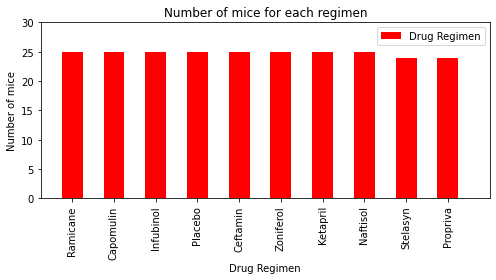

In [43]:
# # Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

Mouse_for_Drug_Regimen.plot(kind="bar", figsize = (7,4), color="red")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice")
plt.title("Number of mice for each regimen")
#plt.xticklabels(Selected_columns_Trail_data_complete_df["Drug Regimen"], rotation=45, horizontalalignment="right")
plt.xlim(-0.75,10)
plt.ylim(0,max(Mouse_for_Drug_Regimen)+5)
plt.legend()
plt.tight_layout()


No handles with labels found to put in legend.


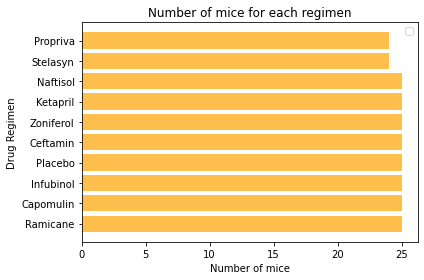

In [104]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x = np.array(["Ramicane","Capomulin","Infubinol","Placebo","Ceftamin","Zoniferol","Ketapril","Naftisol","Stelasyn","Propriva"])
y = np.array([25,25,25,25,25,25,25,25,24,24])

plt.barh(x,y,color="orange",alpha=0.7, align="center")
plt.title("Number of mice for each regimen")
plt.xlabel("Number of mice")
plt.ylabel("Drug Regimen")
plt.tight_layout()


In [45]:
Selected_Gender_columns_Trail_data_complete_df = Trial_data_complete_cleaned_df[["MouseID","Sex"]].copy()
Selected_Gender_columns_Trail_data_complete_df.drop_duplicates(keep='first', inplace = True)
Mouse_Gender_for_Drug_Regimen = Selected_Gender_columns_Trail_data_complete_df["Sex"].value_counts()
Mouse_Gender_for_Drug_Regimen

Male      125
Female    123
Name: Sex, dtype: int64

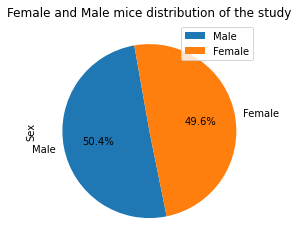

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Mouse_Gender_distribution_chart = Mouse_Gender_for_Drug_Regimen.plot(kind="pie",title = "Female and Male mice distribution of the study",startangle=100,autopct="%1.1f%%")
Mouse_Gender_distribution_chart.legend()

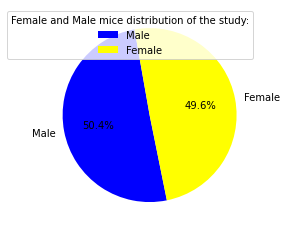

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
y = np.array([125,123])
mylabels = ["Male", "Female"]
mycolors = ["blue", "yellow"]
plt.pie(y,labels=mylabels, colors = mycolors, autopct="%1.1f%%", startangle=100)
plt.legend(title = "Female and Male mice distribution of the study:",loc="best")
plt.show()

## Quartiles, Outliers and Boxplots

In [48]:
#recall the dataset
Trial_data_complete_cleaned_df

,MouseID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,MouseID_Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,k403-0
1,k403,Ramicane,Male,21,16,5,38.825898,0,k403-5
2,k403,Ramicane,Male,21,16,10,35.014271,1,k403-10
3,k403,Ramicane,Male,21,16,15,34.223992,1,k403-15
4,k403,Ramicane,Male,21,16,20,32.997729,1,k403-20
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,z969-25
1889,z969,Naftisol,Male,9,30,30,65.841013,3,z969-30
1890,z969,Naftisol,Male,9,30,35,69.176246,4,z969-35
1891,z969,Naftisol,Male,9,30,40,70.314904,4,z969-40


In [63]:
file_name = "Trial Data Complete Cleaned.xlsx"
Trial_data_complete_cleaned_df.to_excel(file_name)


In [49]:
#Filter out the four most promising drugs
List_Four_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
Four_Drugs_df = Trial_data_complete_cleaned_df[Trial_data_complete_cleaned_df["Drug Regimen"].isin(List_Four_drugs)].copy()
Four_Drugs_df["Drug Regimen"].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Ceftamin'], dtype=object)

In [60]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

Tumor_Volume_df = Four_Drugs_df.groupby(['Drug Regimen','MouseID'])[['Timepoint','Tumor Volume (mm3)']].last()
Tumor_Volume_df = Tumor_Volume_df.reset_index()
Tumor_Volume_df.head()

,Drug Regimen,MouseID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220


In [97]:
filename = "Tumor Volume of 4 Drugs.xlsx"
Tumor_Volume_df.to_excel(filename)

In [55]:
Final_Tumor_Volume = Tumor_Volume_df[["Drug Regimen","Tumor Volume (mm3)"]]
Final_Tumor_Volume

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,38.982878
1,Capomulin,38.939633
2,Capomulin,30.485985
3,Capomulin,37.074024
4,Capomulin,40.159220
...,...,...
95,Ramicane,30.276232
96,Ramicane,40.667713
97,Ramicane,43.166373
98,Ramicane,44.183451


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


In [56]:
Final_Tumor_Volume_Capomulin = Final_Tumor_Volume.loc[Final_Tumor_Volume["Drug Regimen"] == "Capomulin"]
Final_Tumor_Volume_Capomulin

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,38.982878
1,Capomulin,38.939633
2,Capomulin,30.485985
3,Capomulin,37.074024
4,Capomulin,40.159220
5,Capomulin,47.685963
6,Capomulin,37.311846
7,Capomulin,38.125164
8,Capomulin,38.753265
9,Capomulin,41.483008


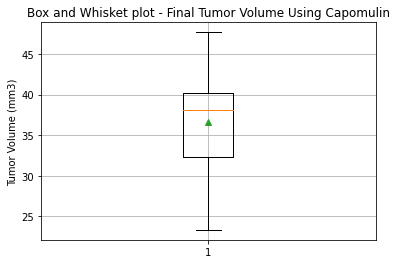

In [80]:
pink_hexagon =dict(markerfacecolor="pink",marker="h")
plt.boxplot(Final_Tumor_Volume_Capomulin["Tumor Volume (mm3)"],showmeans=True,flierprops=pink_hexagon)
plt.title("Box and Whisket plot - Final Tumor Volume Using Capomulin")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.show()

Box and Whisket plot - Final Tumor Volume Using Capomulin
Mean is around 36.667
Median is around 38.125
Upper whisker record just slightly above 47.6859
Lower whiser record at 23.3435

There is no outlier for Ramicane

In [58]:
Final_Tumor_Volume_Ramicane = Final_Tumor_Volume.loc[Final_Tumor_Volume["Drug Regimen"] == "Ramicane"]
Final_Tumor_Volume_Ramicane

,Drug Regimen,Tumor Volume (mm3)
75,Ramicane,38.407618
76,Ramicane,43.047543
77,Ramicane,38.810366
78,Ramicane,32.978522
79,Ramicane,38.342008
80,Ramicane,33.397653
81,Ramicane,37.311236
82,Ramicane,40.659006
83,Ramicane,29.128472
84,Ramicane,33.562402


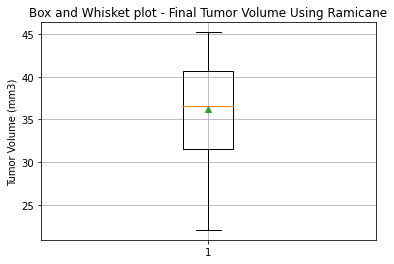

In [83]:
pink_hexagon2 =dict(markerfacecolor="red",marker="H")
plt.boxplot(Final_Tumor_Volume_Ramicane["Tumor Volume (mm3)"],showmeans=True,flierprops=pink_hexagon)
plt.title("Box and Whisket plot - Final Tumor Volume Using Ramicane")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.show()

Box and Whisket plot - Final Tumor Volume Using Ramicane
Mean is at around 36.1913
Median is around 36.5616
Upper whisker record just slightly above 45.22
Lower whiser record at 22.0501

There is no outlier for Ramicane


In [59]:
Final_Tumor_Volume_Ceftamin = Final_Tumor_Volume.loc[Final_Tumor_Volume["Drug Regimen"] == "Ceftamin"]
Final_Tumor_Volume_Ceftamin

,Drug Regimen,Tumor Volume (mm3)
25,Ceftamin,62.999356
26,Ceftamin,45.000000
27,Ceftamin,56.057749
28,Ceftamin,55.742829
29,Ceftamin,48.722078
30,Ceftamin,47.784682
31,Ceftamin,61.849023
32,Ceftamin,68.923185
33,Ceftamin,67.748662
34,Ceftamin,57.918381


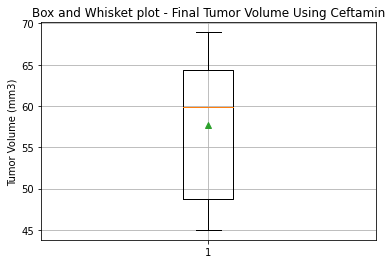

In [86]:
green_octagon =dict(markerfacecolor="g",marker="8")
plt.boxplot(Final_Tumor_Volume_Ceftamin	["Tumor Volume (mm3)"],showmeans=True,flierprops=green_octagon)
plt.title("Box and Whisket plot - Final Tumor Volume Using Ceftamin")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.show()

Box and Whisket plot - Final Tumor Volume Using Ceftamin
Mean is at around 57.75
Median is around 59.85
Upper whisker record just slightly above 68.9231
Lower whiser record at45.0000

There is no outlier for Ceftamin

In [61]:
Final_Tumor_Volume_Infubinol = Final_Tumor_Volume.loc[Final_Tumor_Volume["Drug Regimen"] == "Infubinol"]
Final_Tumor_Volume_Infubinol

,Drug Regimen,Tumor Volume (mm3)
50,Infubinol,67.973419
51,Infubinol,65.525743
52,Infubinol,57.031862
53,Infubinol,66.083066
54,Infubinol,72.226731
55,Infubinol,36.321346
56,Infubinol,60.969711
57,Infubinol,62.435404
58,Infubinol,60.918767
59,Infubinol,67.289621


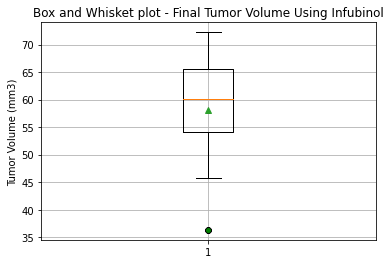

In [87]:
yellow_plus =dict(markerfacecolor="y",marker="P")
plt.boxplot(Final_Tumor_Volume_Infubinol		["Tumor Volume (mm3)"],showmeans=True,flierprops=green_octagon)
plt.title("Box and Whisket plot - Final Tumor Volume Using Infubinol")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.show()

Box and Whisket plot - Final Tumor Volume Using Infubinol
Mean is at around 58.1782
Median is around 60.1651
Upper whisker record just slightly above 72.2267
Lower whiser record at 45.6993

There is an outlier for Infubinol - one of the mousID record abnormal low tumor volume of 36.3213
We should check whether this result is being report to the rightful category of drug regimen before we take further action

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

## Line and Scatter Plots

In [ ]:
#From the main dataframe, only filter the drug - Capomulin and select a mice for the follwoing analysis/plot
Capomulin_df = Trial_data_complete_cleaned_df.loc[Trial_data_complete_cleaned_df["Drug Regimen"] == "Capomulin"]
Capomulin_df.head(50)

,MouseID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,MouseID_Timepoint
10,s185,Capomulin,Female,3,17,0,45.000000,0,s185-0
11,s185,Capomulin,Female,3,17,5,43.878496,0,s185-5
12,s185,Capomulin,Female,3,17,10,37.614948,0,s185-10
13,s185,Capomulin,Female,3,17,15,38.177232,0,s185-15
14,s185,Capomulin,Female,3,17,20,36.866876,0,s185-20
15,s185,Capomulin,Female,3,17,25,33.949940,0,s185-25
16,s185,Capomulin,Female,3,17,30,32.959671,1,s185-30
17,s185,Capomulin,Female,3,17,35,28.328531,1,s185-35
18,s185,Capomulin,Female,3,17,40,25.472143,1,s185-40
19,s185,Capomulin,Female,3,17,45,23.343598,1,s185-45


In [ ]:
# Get an understanding of the mean stat of the above df
Capomulin_df.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,230.000000,230.000000,230.000000,230.000000,230.000000
mean,13.456522,19.965217,21.565217,40.675741,0.713043
std,7.721423,2.732404,14.384994,4.994774,0.848993
min,1.000000,15.000000,0.000000,23.343598,0.000000
25%,7.000000,17.000000,10.000000,37.685933,0.000000
50%,16.500000,20.500000,20.000000,41.557809,0.000000
75%,20.000000,22.000000,35.000000,45.000000,1.000000
max,24.000000,25.000000,45.000000,48.158209,3.000000


In [ ]:
#random select MouseID #m601 as the subject for following plot
Chosen_Sample_df = Capomulin_df.loc[Capomulin_df["MouseID"] == "m601"]
Chosen_Sample_df.head(10)

,MouseID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,MouseID_Timepoint
30,m601,Capomulin,Male,22,17,0,45.000000,0,m601-0
31,m601,Capomulin,Male,22,17,5,41.408591,1,m601-5
32,m601,Capomulin,Male,22,17,10,36.825367,1,m601-10
33,m601,Capomulin,Male,22,17,15,35.464612,1,m601-15
34,m601,Capomulin,Male,22,17,20,34.255732,1,m601-20
35,m601,Capomulin,Male,22,17,25,33.118756,1,m601-25
36,m601,Capomulin,Male,22,17,30,31.758275,1,m601-30
37,m601,Capomulin,Male,22,17,35,30.834357,1,m601-35
38,m601,Capomulin,Male,22,17,40,31.378045,1,m601-40
39,m601,Capomulin,Male,22,17,45,28.430964,1,m601-45


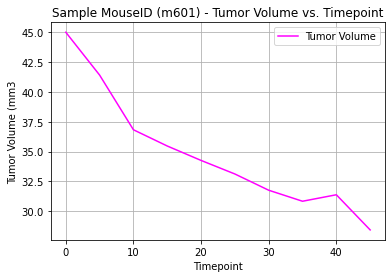

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Set the x and y lists
timepoint = np.arange(0,50,5)
Tumor_Volume_mm3 = [45.000000,41.408591,36.825367,35.464612,34.255732,33.118756,31.758275,30.834357,31.378045,28.430964]
Tumor_Volume, = plt.plot(timepoint,Tumor_Volume_mm3,color="magenta",label="Tumor Volume")
plt.title("Sample MouseID (m601) - Tumor Volume vs. Timepoint")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3")
plt.legend()
plt.grid()


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


In [ ]:
Weight_and_Tumor_Volume_df = Four_Drugs_df.groupby(['Drug Regimen','MouseID'])[["Weight (g)",'Tumor Volume (mm3)']].mean()
Weight_and_Tumor_Volume_df = Weight_and_Tumor_Volume_df.reset_index()
Weight_and_Tumor_Volume_df

,Drug Regimen,MouseID,Weight (g),Tumor Volume (mm3)
0,Capomulin,b128,22.0,41.963636
1,Capomulin,b742,21.0,40.083699
2,Capomulin,f966,17.0,36.505973
3,Capomulin,g288,19.0,41.990097
4,Capomulin,g316,22.0,44.613344
...,...,...,...,...
95,Ramicane,s508,17.0,36.050156
96,Ramicane,u196,25.0,45.576395
97,Ramicane,w678,24.0,44.083186
98,Ramicane,y449,24.0,45.359772


In [ ]:
Capomulin_weight_and_Tumor = Weight_and_Tumor_Volume_df.loc[Weight_and_Tumor_Volume_df["Drug Regimen"] == "Capomulin"] 
Capomulin_weight_and_Tumor

,Drug Regimen,MouseID,Weight (g),Tumor Volume (mm3)
0,Capomulin,b128,22.0,41.963636
1,Capomulin,b742,21.0,40.083699
2,Capomulin,f966,17.0,36.505973
3,Capomulin,g288,19.0,41.990097
4,Capomulin,g316,22.0,44.613344
5,Capomulin,i557,24.0,44.805810
6,Capomulin,i738,20.0,39.141053
7,Capomulin,j119,23.0,44.465236
8,Capomulin,j246,21.0,43.216925
9,Capomulin,l509,21.0,44.434474


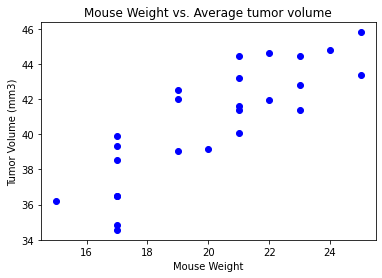

In [ ]:
plt.scatter(Capomulin_weight_and_Tumor.iloc[:,2],Capomulin_weight_and_Tumor.iloc[:,3], c="blue")
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average tumor volume")
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

Mouse_weight = Capomulin_weight_and_Tumor.iloc[:,2]
Tumor = Capomulin_weight_and_Tumor.iloc[:,3]
correlation = st.pearsonr(Mouse_weight, Tumor)
print(f"The Correction between both factors is {round(correlation[0],2)}")


The Correction between both factors is 0.84


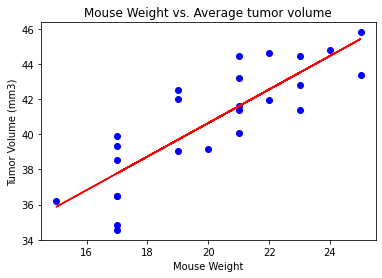

The r-squared is: 0.7088568047708723


In [ ]:
#Add the linear regression equation and line to scatter plot
x_values = Capomulin_weight_and_Tumor["Weight (g)"]
y_values = Capomulin_weight_and_Tumor["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Capomulin_weight_and_Tumor.iloc[:,2],Capomulin_weight_and_Tumor.iloc[:,3], c="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,9),fontsize=20,color="red")
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average tumor volume")
plt.show()
print(f"The r-squared is: {rvalue**2}")